# Machine Learning 지도학습 - 분류

## 환경 설정

In [108]:
# !pip install scikit-learn -q

In [109]:
import sklearn
from babel.util import distinct
from scipy.sparse import safely_cast_index_arrays

sklearn.__version__

'1.7.2'

In [110]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [111]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
# 마이너스 깨질 때 사용해라!
plt.rc('axes', unicode_minus=False)

## 생선 이진 분류 - 도미냐? 빙어냐?
<table>
    <tr>
        <td><img src="https://d.pr/i/FaQ4RH+" width="300"></td>
        <td><img src="https://d.pr/i/NmXwPX+" width="300"></td>
    </tr>
</table>


In [113]:
# 도미 bream
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 빙어 smelt
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


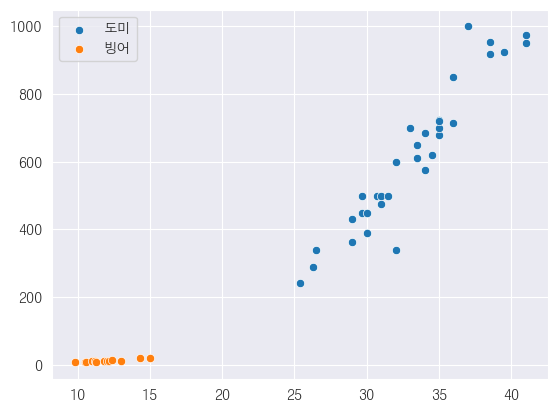

In [114]:
# 산포도 시각화
sns.scatterplot(x=bream_length, y=bream_weight, label = '도미')
sns.scatterplot(x=smelt_length, y=smelt_weight, label = '빙어')
plt.legend()
plt.show()


## KNN K-최근접이웃분류모델
데이터포인트간의 거리기반으로 분류를 수행하는 모델

In [115]:
# 학습을 위한 데이터포맷
# - 문제 : dataframe, ndarray
# - 답 : 분류(0, 1)

length = bream_length +  smelt_length # 35+14
weight = bream_weight +  smelt_weight
print(len(length), len(weight)) # -> 둘이 짝꿍이 되게끔

# 문제 : 하나의 ndarray 생성
fish_data = np.array([[length, weight] for length, weight in zip(length, weight)])
fish_data # length랑 weight가 묶인 리스트들이 만들어짐, 그걸 array로 감쌈




49 49


array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [116]:
# 답(label) : 이진분류 1(도미), 0(빙어)
fish_target = np.array([1]*35 + [0] *14)
fish_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [117]:
# 모델 준비
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [118]:
# 모델 학습
kn_clf.fit(fish_data, fish_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [119]:
# 모델 성능 평가
kn_clf.score(fish_data, fish_target)

1.0

In [120]:
# 모델 예측
# - 학습한 문제의 형식 그대로 문제 제공

kn_clf.predict([[40, 500], [10, 10]]) # 도미, 빙어 예측 성공



array([1, 0])

### k-최근접 이웃 알고리즘 작동원리


최근접이웃(K-Nearest Neighbors, KNN)에서 거리를 구하는 방법으로 가장 일반적으로 사용되는 방법은 **유클리드 거리(Euclidean distance)**이다.


유클리드 거리란 "두 점 사이의 직선 거리" 를 구하는 가장 간단한 방법이다.


좌표상 (0, 0)과 (3, 4)라는 점 두 개를 찍었다고 하자. 이 두 점을 선으로 연결하면, 바로 그 선의 길이가 유클리드 거리이다!


$$\text { 거리 }=\sqrt{\left(x_{2}-x_{1}\right)^{2}+\left(y_{2}-y_{1}\right)^{2}}$$


두 점 $p = (p_1, p_2, ..., p_n)$과 $q = (q_1, q_2, ..., q_n)$ 사이의 유클리드 거리는 다음과 같은 수식으로 계산된다.


$$d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2}$$


#### 다양한 거리계산법
이 외에도 거리 계산에 사용하는 방법에는 **맨해튼 거리(Manhattan distance)**, **민코프스키 거리(Minkowski distance)**, **코사인 유사도(Cosine similarity)** 등이 있다.


1. 맨해튼 거리 계산식:


$$d(p, q) = |p_1 - q_1| + |p_2 - q_2| + \cdots + |p_n - q_n|$$


2. 민코프스키 거리 계산식(유클리드와 맨해튼 거리를 일반화한 형태):
  (여기서 $p = 2$일 때는 유클리드 거리, $p = 1$일 때는 맨해튼 거리이다)
$$d(p, q) = \left( \sum_{i=1}^{n} |p_i - q_i|^p \right)^{1/p}$$


3. 코사인 유사도:
  (여기서 $p \cdot q$는 두 벡터의 내적, $\|p\|$와 $\|q\|$는 벡터의 크기이다)
$$\cos \theta = \frac{p \cdot q}{\|p\| \|q\|}$$


In [121]:
# 이웃 확인
distances, index = kn_clf.kneighbors([[40, 500], [10,10]])
print(distances, index)

# 최근접이웃 target 확인
fish_target[index]

# print(fish_target[index])

[[ 8.5         9.          9.3        10.3        26.57066051]
 [ 1.04403065  1.21655251  1.8         1.80277564  1.83847763]] [[12 11  9  6 10]
 [38 39 41 42 40]]


array([[1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0]])

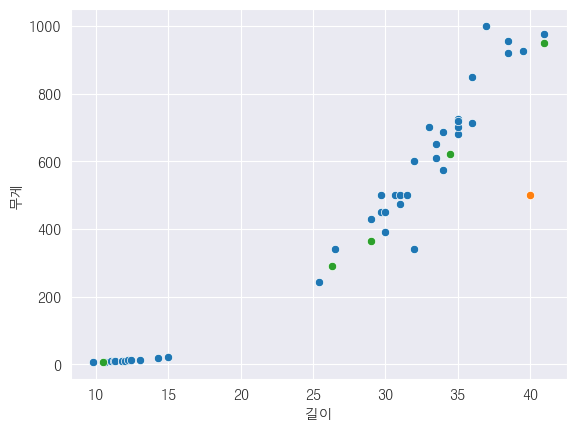

In [132]:
# 최근접 이웃 시각화
sns.scatterplot(x = fish_data[:, 0], y = fish_data[:, 1]) # 학습 데이터
sns.scatterplot(x = [40], y=[500])
index = index.squeeze() # 2차원 -> 1차원
sns.scatterplot(x = fish_data[index, 0], y = fish_data[index, 1])

plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

# 학습/테스트 세트 분리

In [133]:
from sklearn.model_selection import train_test_split

# 학습/테스트 셋 분리
(X_train, X_test, y_train, y_test) = train_test_split(fish_data, fish_target, test_size = 0.2, random_state = 42, stratify = fish_target )
# test_size : 전체 데이터 중 테스트 세트의 비율 (0.1 = 10%)
# 기본값 :0.25
# random_state = 42 : 랜덤값 고정
# stratify = fish_target : 학습 데이터의 비율을 유지하면서 분리


# random_state2: 랜덤값 공정
print('X_train : ', X_train.shape) # 학습
print('y_train : ', y_train.shape) # 학습에 쓰일 라벨 (정답)
print('X_test : ', X_test.shape) # 시험문제 정답
print('y_test : ', y_test.shape) # 정답지




print('X_train : ', X_train) # 학습
print('y_train : ', y_train) # 학습에 쓰일 라벨 (정답)
print('X_test : ', X_test) # 시험문제 정답
print('y_test : ', y_test) # 정답지

# 매번 테스트에 들어가는 구성이 랜덤으로 들어가기 때문에 값이 매번 바뀐다.
# 데이터 분할이 매번 달라지면 성능도 달라질 수 있다.




X_train :  (39, 2)
y_train :  (39,)
X_test :  (10, 2)
y_test :  (10,)
X_train :  [[  11.3    8.7]
 [  25.4  242. ]
 [  11.8    9.9]
 [  12.2   12.2]
 [  38.5  955. ]
 [  35.   725. ]
 [  32.   600. ]
 [  32.   340. ]
 [  35.   700. ]
 [  32.   600. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  33.5  650. ]
 [  33.5  610. ]
 [  30.   450. ]
 [  39.5  925. ]
 [  11.2    9.8]
 [  12.     9.8]
 [  36.   850. ]
 [  29.   363. ]
 [  30.7  500. ]
 [  31.5  500. ]
 [  14.3   19.7]
 [  31.   475. ]
 [  38.5  920. ]
 [   9.8    6.7]
 [  33.   700. ]
 [  10.5    7.5]
 [  36.   714. ]
 [  10.6    7. ]
 [  37.  1000. ]
 [  30.   390. ]
 [  33.   700. ]
 [  29.   430. ]
 [  13.    12.2]
 [  41.   975. ]
 [  15.    19.9]
 [  35.   720. ]
 [  34.5  620. ]]
y_train :  [0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 1]
X_test :  [[ 26.3 290. ]
 [ 11.8  10. ]
 [ 34.  685. ]
 [ 31.  500. ]
 [ 12.4  13.4]
 [ 26.5 340. ]
 [ 35.  680. ]
 [ 34.  575. ]
 [ 11.    9.7]
 [ 41.  950. ]]
y_

In [134]:

# 모델 준비
kn_clf = KNeighborsClassifier()


# 학습
kn_clf.fit(X_train, y_train)

# 성능 평가
print(kn_clf.score(X_train, y_train))

# 예측
print(kn_clf.predict(X_test)) # 예측값
print(y_test) # 정답지

1.0
[1 0 1 1 0 1 1 1 0 1]
[1 0 1 1 0 1 1 1 0 1]


### 수상한 도미
도미(길이 25, 무게 150)의 문제

In [142]:
kn_clf.predict([[25, 150]]) #빙어로 예측


array([1])

[[150.2675072  150.27996089 150.3795216  150.4543032  150.48510969]] [[30 35  4 15 24]]
[1 1 1 1 1]


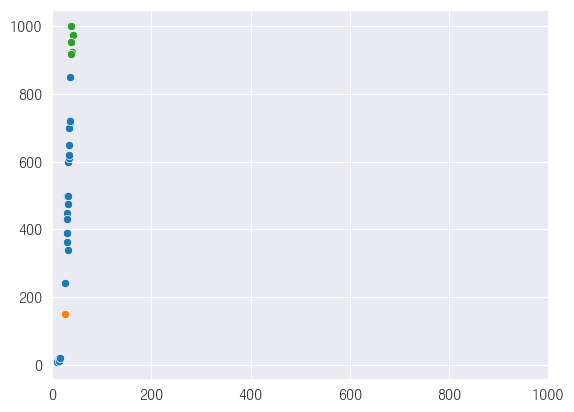

In [154]:
# 수상한 도미 시각화
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1])
sns.scatterplot(x=[25], y=[150])

# 이웃 확인
distance, index = kn_clf.kneighbors([[25, 150]])

print(distance, index)
index = index.squeeze() # 2차원 -> 1차원
print(y_train[index])

sns.scatterplot(x=X_train[index, 0], y=X_train[index, 1])

# x, y축을 동일하게 처리
plt.xlim((0, 1000))
plt.show()

## 표준점수 - 스케일링
서로 다른속성의 값의 범위를 맞추기 위한 전처리 기법
모델 성능에 직접적인 영향이 있음

###  표준점수로 환산하기
표준점수(또는 Z-점수)는 데이터가 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 나타낸 값이다.
$Z = \frac{X - \mu}{\sigma}$
-   $X$는 데이터 값
-   $\mu$는 데이터의 평균
-   $\sigma$는 데이터의 표준편차
특성값에서 평균을 빼고, 표준편차로 나누기.


In [144]:
from sklearn.preprocessing import StandardScaler

# 학습/테스트 셋 분리
(X_train, X_test, y_train, y_test) = train_test_split(fish_data, fish_target, test_size = 0.2, random_state = 42, stratify = fish_target)


# 학습/테스트 데이터 전처리(스케일링)
scaler = StandardScaler()

# X_train의 속성별 평균/표준편차를 구하는 fit,
# 이를 토대로 실제 데이터를 변환하는 transform
X_train_scaled = scaler.fit_transform(X_train)

# 이미 scaler에 학습된 (fit) 평균/표준편차를 토대로 테스트 데이터 변경
# (주의) 다시 fit하면 안된다.
X_test_scaled = scaler.transform(X_test)

# 정답은 스케일링하지 않는다.
print(X_train_scaled) # 계산된 값이 보임
# print(X_train_scaled)

[[-1.58299969 -1.3623164 ]
 [-0.18349562 -0.64945483]
 [-1.53337188 -1.35864973]
 [-1.49366964 -1.35162194]
 [ 1.11675283  1.52915767]
 [ 0.76935821  0.82637944]
 [ 0.47159139  0.44443476]
 [ 0.47159139 -0.35001019]
 [ 0.76935821  0.74999051]
 [ 0.47159139  0.44443476]
 [ 0.24330349 -0.01389887]
 [ 0.24330349  0.13887901]
 [ 0.6204748   0.59721263]
 [ 0.6204748   0.47499033]
 [ 0.27308017 -0.01389887]
 [ 1.21600844  1.43749094]
 [-1.59292525 -1.35895528]
 [-1.51352076 -1.35895528]
 [ 0.86861382  1.20832413]
 [ 0.17382456 -0.27973237]
 [ 0.3425591   0.13887901]
 [ 0.42196358  0.13887901]
 [-1.28523287 -1.32870526]
 [ 0.37233578  0.06249007]
 [ 1.11675283  1.42221316]
 [-1.7318831  -1.36842751]
 [ 0.57084699  0.74999051]
 [-1.66240417 -1.36598306]
 [ 0.86861382  0.79276831]
 [-1.65247861 -1.36751084]
 [ 0.96786942  1.66665776]
 [ 0.27308017 -0.19723232]
 [ 0.57084699  0.74999051]
 [ 0.17382456 -0.07501002]
 [-1.41426516 -1.35162194]
 [ 1.36489185  1.59026882]
 [-1.21575394 -1.32809415]
 

# 모델 생성/학습

In [139]:
# 모델 생성/학습
kn_clf = KNeighborsClassifier()

# 학습
kn_clf.fit(X_train_scaled, y_train)

# 평가
kn_clf.score(X_test_scaled, y_test)

1.0

In [147]:
# 수상한 도미
q = scaler.transform([[25, 100]])
print(q)

kn_clf.predict(q) # 너 예측 해봐라고 지정해주어야함.


[[-0.22319787 -1.083344  ]]


array([1])

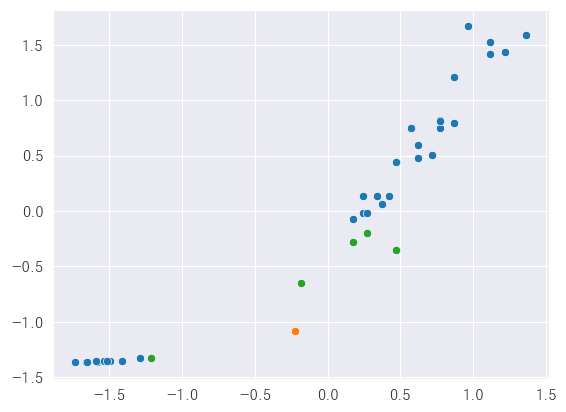

In [152]:
# 스케일링 처리 후 시각화
# 학습 데이터
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1])

# 문제
sns.scatterplot(x=q[:, 0], y=q[:, 1])

# 이웃 확인
distances, index = kn_clf.kneighbors(q)
sns.scatterplot(x=X_train_scaled[index.squeeze(),0],
                y=X_train_scaled[index.squeeze(),1])

plt.show()
